In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import dataset
dataset=pd.read_csv("C:/Users/coderflo1/Desktop/SouthGermanCredit/dat.csv",low_memory=False)

In [3]:
dataset.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
# Print value counts per column
for i in dataset.columns:
    print('')
    print(i,'------')
    print(dataset[i].value_counts())


status ------
... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64

duration ------
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: duration, dtype: int64

credit_history ------
no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64

purpose ------
furniture/equipment    280
others                 234

In [5]:
#keep categorical columns only
dataset1=dataset.drop(["duration","amount","age","telephone"], axis=1)

In [6]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
dataset2 = pd.DataFrame() 

for i in dataset1.columns :
  dataset2[i]=label.fit_transform(dataset1[i])

In [7]:
dataset2.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,foreign_worker,credit_risk
0,3,0,2,4,2,2,0,2,3,1,1,0,0,1,0,0,1
1,3,0,5,4,0,1,3,2,0,3,1,0,1,1,1,0,1
2,0,4,8,0,1,1,0,2,3,3,1,0,0,3,0,0,1
3,3,0,5,4,0,0,3,2,0,3,1,0,1,3,1,1,1
4,3,0,5,4,0,2,3,2,3,1,0,2,1,3,0,1,1


In [8]:
from scipy.stats import chi2_contingency
#import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Crosstab
  chi2 = chi2_contingency(crosstab)[0] 
  n = np.sum(crosstab)
  phi2 = chi2 / n
  r, k = crosstab.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1) 
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [9]:
rows= []

for var1 in dataset2:
  col = []
  for var2 in dataset2 :
    cramers =cramers_V(dataset2[var1], dataset2[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Rounded to 2 decimal places  
  rows.append(col)
  
cramers_results = np.array(rows)
dataset3 = pd.DataFrame(cramers_results, columns = dataset2.columns, index =dataset2.columns)


dataset3

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,foreign_worker,credit_risk
status,1.00,0.13,0.12,0.16,0.07,0.00,0.04,0.09,0.08,0.05,0.03,0.08,0.05,0.05,0.05,0.05,0.35
credit_history,0.13,1.00,0.14,0.03,0.08,0.00,0.07,0.06,0.04,0.05,0.26,0.07,0.37,0.01,0.07,0.00,0.24
purpose,0.12,0.14,1.00,0.06,0.08,0.10,0.12,0.14,0.09,0.18,0.11,0.18,0.04,0.18,0.13,0.14,0.16
savings,0.16,0.03,0.06,1.00,0.06,0.02,0.00,0.07,0.04,0.05,0.00,0.00,0.05,0.02,0.00,0.00,0.18
employment_duration,0.07,0.08,0.08,0.06,1.00,0.09,0.15,0.05,0.25,0.13,0.03,0.16,0.10,0.31,0.07,0.00,0.12
installment_rate,0.00,0.00,0.10,0.02,0.09,1.00,0.09,0.00,0.01,0.00,0.00,0.05,0.01,0.05,0.06,0.10,0.05
personal_status_sex,0.04,0.07,0.12,0.00,0.15,0.09,1.00,0.00,0.09,0.11,0.00,0.19,0.05,0.05,0.28,0.06,0.08
other_debtors,0.09,0.06,0.14,0.07,0.05,0.00,0.00,1.00,0.00,0.13,0.03,0.04,0.00,0.06,0.02,0.13,0.07
present_residence,0.08,0.04,0.09,0.04,0.25,0.01,0.09,0.00,1.00,0.12,0.00,0.23,0.07,0.00,0.03,0.01,0.00
property,0.05,0.05,0.18,0.05,0.13,0.00,0.11,0.13,0.12,1.00,0.08,0.55,0.04,0.19,0.08,0.14,0.14


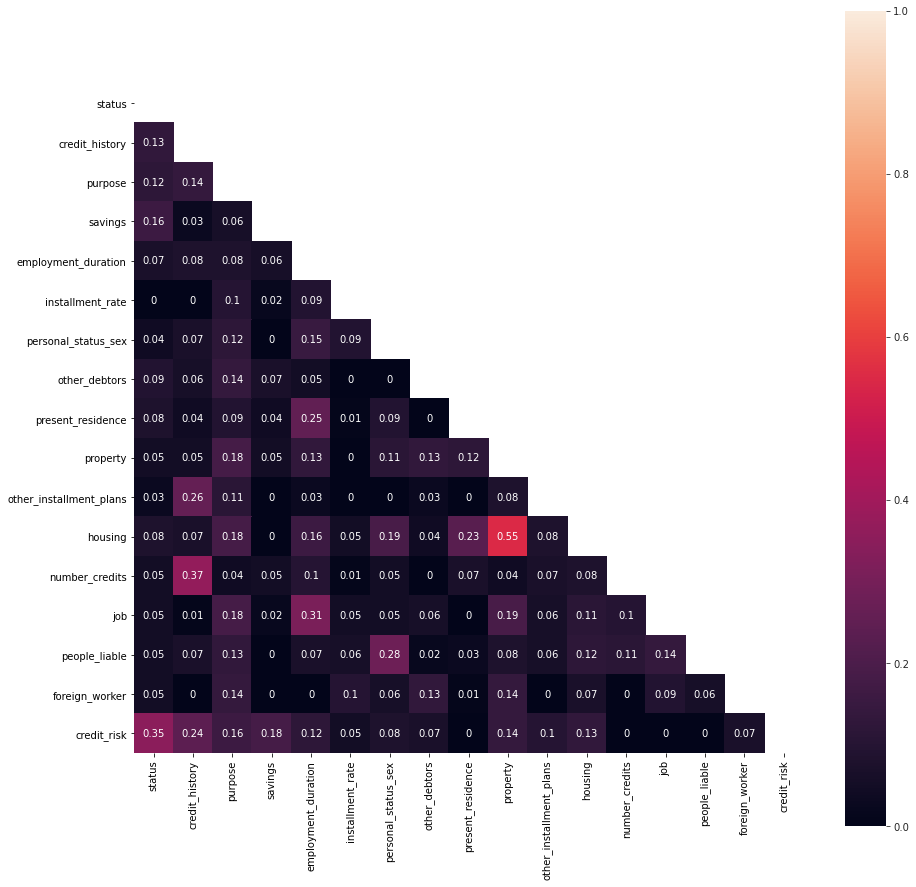

In [10]:
mask = np.zeros_like(dataset3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

with sns.axes_style("white"):
  ax = sns.heatmap(dataset3, mask=mask,vmin=0., vmax=1, square=True, annot=True)

plt.show()